<a href="https://colab.research.google.com/github/ar1905ru/Neural-Networkk/blob/main/Copy_of_Apple_Disease_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting Google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [ ]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image_dataset_from_directory
from keras.layers import Conv2D, Dense, MaxPooling2D, Dropout,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models
from sklearn.naive_bayes import CategoricalNB

In [ ]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import os
import seaborn as sns
from sklearn.utils import shuffle
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from tensorflow.keras import models
from tensorflow import keras
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [ ]:
dir ='/content/drive/MyDrive/Rutgers/Apple Disease Classification'
file_list = os.listdir(dir)

Function to Split Dataset

In [ ]:
# This will be an int32 tensor by default; see "dtypes" below.
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS = 3
EPOCHS=50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dir, 
    shuffle = True,
    image_size =(256,256),
    batch_size=32
)

Found 3571 files belonging to 5 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Non_Apple_Weed']

In [ ]:
len(dataset)

112

Visualize some of the images from our dataset

(32, 256, 256, 3)
[3 3 3 4 3 4 3 3 3 3 4 3 2 3 1 0 3 1 3 3 4 3 1 3 2 3 4 3 1 1 1 0]
3
(32, 256, 256, 3)
[3 3 3 4 3 4 3 3 3 3 4 3 2 3 1 0 3 1 3 3 4 3 1 3 2 3 4 3 1 1 1 0]
3
(32, 256, 256, 3)
[3 3 3 4 3 4 3 3 3 3 4 3 2 3 1 0 3 1 3 3 4 3 1 3 2 3 4 3 1 1 1 0]
3
(32, 256, 256, 3)
[3 3 3 4 3 4 3 3 3 3 4 3 2 3 1 0 3 1 3 3 4 3 1 3 2 3 4 3 1 1 1 0]
4
(32, 256, 256, 3)
[3 3 3 4 3 4 3 3 3 3 4 3 2 3 1 0 3 1 3 3 4 3 1 3 2 3 4 3 1 1 1 0]
3
(32, 256, 256, 3)
[3 3 3 4 3 4 3 3 3 3 4 3 2 3 1 0 3 1 3 3 4 3 1 3 2 3 4 3 1 1 1 0]
4
(32, 256, 256, 3)
[3 3 3 4 3 4 3 3 3 3 4 3 2 3 1 0 3 1 3 3 4 3 1 3 2 3 4 3 1 1 1 0]
3
(32, 256, 256, 3)
[3 3 3 4 3 4 3 3 3 3 4 3 2 3 1 0 3 1 3 3 4 3 1 3 2 3 4 3 1 1 1 0]
3
(32, 256, 256, 3)
[3 3 3 4 3 4 3 3 3 3 4 3 2 3 1 0 3 1 3 3 4 3 1 3 2 3 4 3 1 1 1 0]
3
(32, 256, 256, 3)
[3 3 3 4 3 4 3 3 3 3 4 3 2 3 1 0 3 1 3 3 4 3 1 3 2 3 4 3 1 1 1 0]
3
(32, 256, 256, 3)
[3 3 3 4 3 4 3 3 3 3 4 3 2 3 1 0 3 1 3 3 4 3 1 3 2 3 4 3 1 1 1 0]
4
(32, 256, 256, 3)
[3 3 3 4 3 4 3 3 3 3 4 3 2 3 1 0 3 1

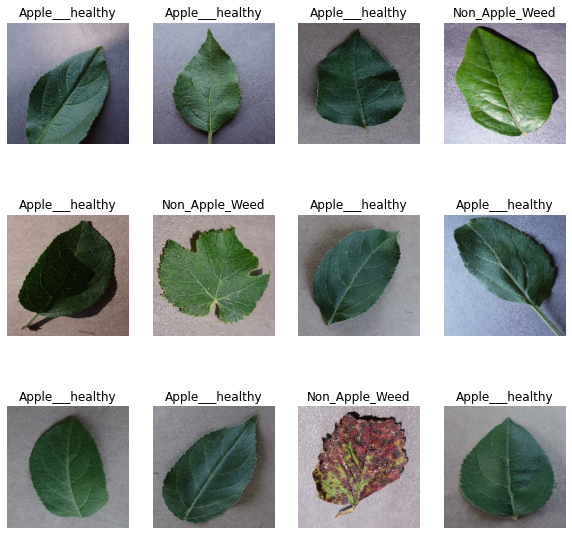

In [ ]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        print (image_batch.shape)
        print (label_batch.numpy())
        print (label_batch[i].numpy())
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1200):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

89
11
12


In [ ]:
train_ds=train_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale= tf.keras.Sequential([
    layers.experimental. preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"), 
    layers.experimental.preprocessing.RandomRotation(0.2),
])

**Model Architecture**

We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

We are going to use convolutional neural network (CNN) here. CNN is popular for image classification tasks. Watch below video to understand fundamentals of CNN

In [ ]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=15
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape), 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64, (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Flatten(), 
    layers.Dense(64, activation="relu"), 
    layers.Dense(n_classes, activation="softmax"),
    
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

**Compiling the Model**

We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [ ]:
model.compile(
    optimizer ="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    verbose=1, 
    validation_data=val_ds
)

Epoch 1/50
89/89 [==============================] - 262s 80ms/step - loss: 1.3972 - accuracy: 0.4811 - val_loss: 1.0113 - val_accuracy: 0.5881
Epoch 2/50
89/89 [==============================] - 4s 40ms/step - loss: 1.0017 - accuracy: 0.5848 - val_loss: 0.9028 - val_accuracy: 0.5966
Epoch 3/50
89/89 [==============================] - 4s 40ms/step - loss: 0.8308 - accuracy: 0.6677 - val_loss: 0.6972 - val_accuracy: 0.7443
Epoch 4/50
89/89 [==============================] - 4s 40ms/step - loss: 0.6642 - accuracy: 0.7422 - val_loss: 0.6244 - val_accuracy: 0.7585
Epoch 5/50
89/89 [==============================] - 4s 40ms/step - loss: 0.5811 - accuracy: 0.7852 - val_loss: 0.5299 - val_accuracy: 0.8097
Epoch 6/50
89/89 [==============================] - 4s 40ms/step - loss: 0.5672 - accuracy: 0.7862 - val_loss: 0.6445 - val_accuracy: 0.7869
Epoch 7/50
89/89 [==============================] - 4s 40ms/step - loss: 0.4867 - accuracy: 0.8180 - val_loss: 0.5892 - val_accuracy: 0.8068
Epoch 8/50


In [ ]:
validation_steps = 20

loss0,accuracy0 = model.evaluate(val_ds, steps = validation_steps)

print("loss: {:.2f}".format(loss0))
print("accuracy: {:.2f}".format(accuracy0))

20/20 [==============================] - 0s 11ms/step - loss: 0.1855 - accuracy: 0.9403
loss: 0.19
accuracy: 0.94


**Plotting the Accuracy and Loss Curves**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

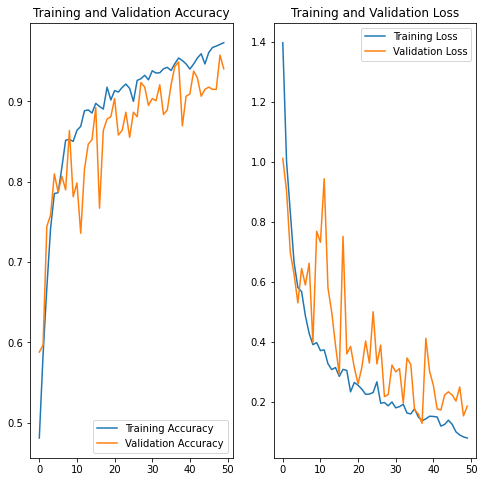

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Running prediction on sample image

first image to predict
actual label: Apple___Cedar_apple_rust
predicted label: Apple___Cedar_apple_rust


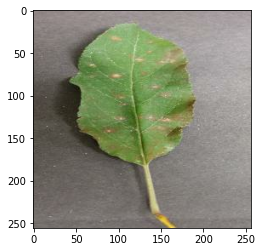

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
#inference function

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

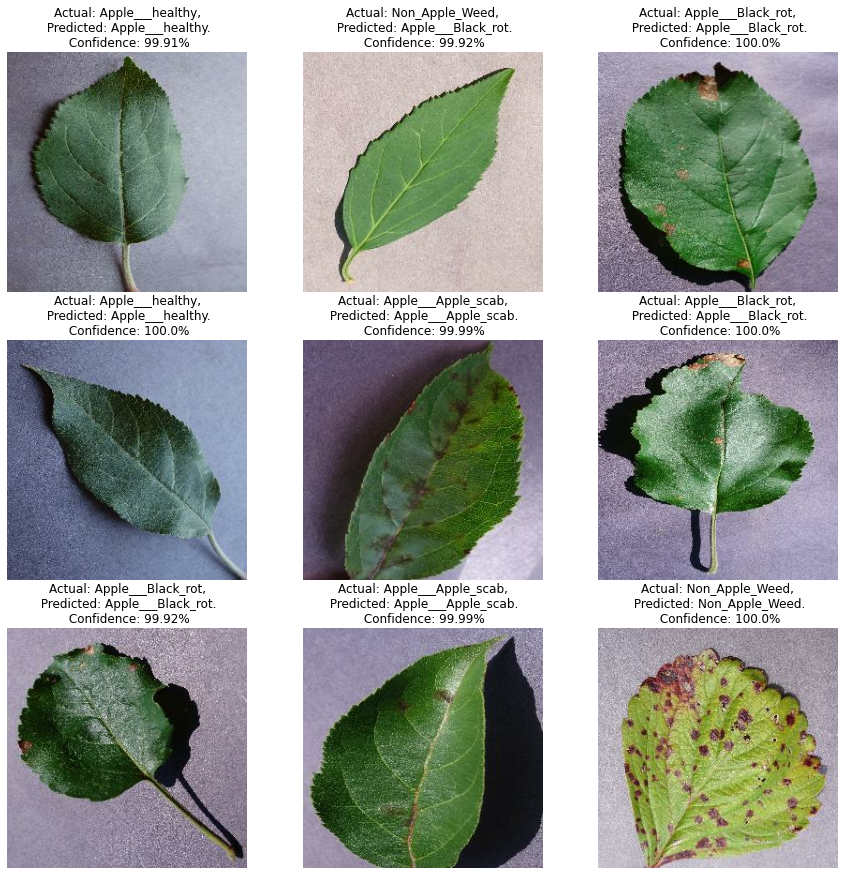

In [ ]:
#inference on sample images

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
#model_version =2
#model.save(f"./content/drive/MyDrive/Rutgers/Neural Final Project/{model_version}")

INFO:tensorflow:Assets written to: ./content/drive/MyDrive/Rutgers/Neural Final Project/2/assets


In [ ]:
model_version =1
model.save(f"/content/drive/MyDrive/Rutgers/Neural Final Project/Saved Model/{model_version}")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Rutgers/Neural Final Project/Saved Model/1/assets


In [ ]:
model.fit_one_cycle(50)

AttributeError: ignored